In [1]:
# Import necessary libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt   # plotting
import seaborn as sns   # plotting heatmap

%matplotlib inline

In [2]:
df = pd.read_csv('/kaggle/input/metro-train-dataset/MetroPT3(AirCompressor).csv')
df.head()

,Unnamed: 0,timestamp,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_eletric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses
0,0,2020-02-01 00:00:00,-0.012,9.358,9.340,-0.024,9.358,53.600,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
1,10,2020-02-01 00:00:10,-0.014,9.348,9.332,-0.022,9.348,53.675,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
2,20,2020-02-01 00:00:19,-0.012,9.338,9.322,-0.022,9.338,53.600,0.0425,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
3,30,2020-02-01 00:00:29,-0.012,9.328,9.312,-0.022,9.328,53.425,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
4,40,2020-02-01 00:00:39,-0.012,9.318,9.302,-0.022,9.318,53.475,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0


In [3]:
# Import data, convert string dates to 'datetime64' and set the date column as index:
df = pd.read_csv('/kaggle/input/metro-train-dataset/MetroPT3(AirCompressor).csv',
                 parse_dates=['timestamp'],
                 infer_datetime_format=True,
                 index_col='timestamp',
                 thousands=',',
                 decimal='.'
                )

In [4]:
#  Review the general info on data, paying attention to missing values and dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1516948 entries, 2020-02-01 00:00:00 to 2020-09-01 03:59:50
Data columns (total 16 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   Unnamed: 0       1516948 non-null  int64  
 1   TP2              1516948 non-null  float64
 2   TP3              1516948 non-null  float64
 3   H1               1516948 non-null  float64
 4   DV_pressure      1516948 non-null  float64
 5   Reservoirs       1516948 non-null  float64
 6   Oil_temperature  1516948 non-null  float64
 7   Motor_current    1516948 non-null  float64
 8   COMP             1516948 non-null  float64
 9   DV_eletric       1516948 non-null  float64
 10  Towers           1516948 non-null  float64
 11  MPG              1516948 non-null  float64
 12  LPS              1516948 non-null  float64
 13  Pressure_switch  1516948 non-null  float64
 14  Oil_level        1516948 non-null  float64
 15  Caudal_impulses  1516948 non-null

In [5]:
# Let's remove the empty column and look at some examples of data:
df = df.drop(columns='Unnamed: 0')
print(f'data shape = {df.shape}')
df.head()

data shape = (1516948, 15)


,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_eletric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses
timestamp,,,,,,,,,,,,,,,
2020-02-01 00:00:00,-0.012,9.358,9.340,-0.024,9.358,53.600,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
2020-02-01 00:00:10,-0.014,9.348,9.332,-0.022,9.348,53.675,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
2020-02-01 00:00:19,-0.012,9.338,9.322,-0.022,9.338,53.600,0.0425,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
2020-02-01 00:00:29,-0.012,9.328,9.312,-0.022,9.328,53.425,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
2020-02-01 00:00:39,-0.012,9.318,9.302,-0.022,9.318,53.475,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0


In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
TP2,1516948.0,1.367826,3.250930,-0.032,-0.014,-0.012,-0.0100,10.676
TP3,1516948.0,8.984611,0.639095,0.730,8.492,8.960,9.4920,10.302
H1,1516948.0,7.568155,3.333200,-0.036,8.254,8.784,9.3740,10.288
DV_pressure,1516948.0,0.055956,0.382402,-0.032,-0.022,-0.020,-0.0180,9.844
Reservoirs,1516948.0,8.985233,0.638307,0.712,8.494,8.960,9.4920,10.300
Oil_temperature,1516948.0,62.644182,6.516261,15.400,57.775,62.700,67.2500,89.050
Motor_current,1516948.0,2.050171,2.302053,0.020,0.040,0.045,3.8075,9.295
COMP,1516948.0,0.836957,0.369405,0.000,1.000,1.000,1.0000,1.000
DV_eletric,1516948.0,0.160611,0.367172,0.000,0.000,0.000,0.0000,1.000
Towers,1516948.0,0.919848,0.271528,0.000,1.000,1.000,1.0000,1.000


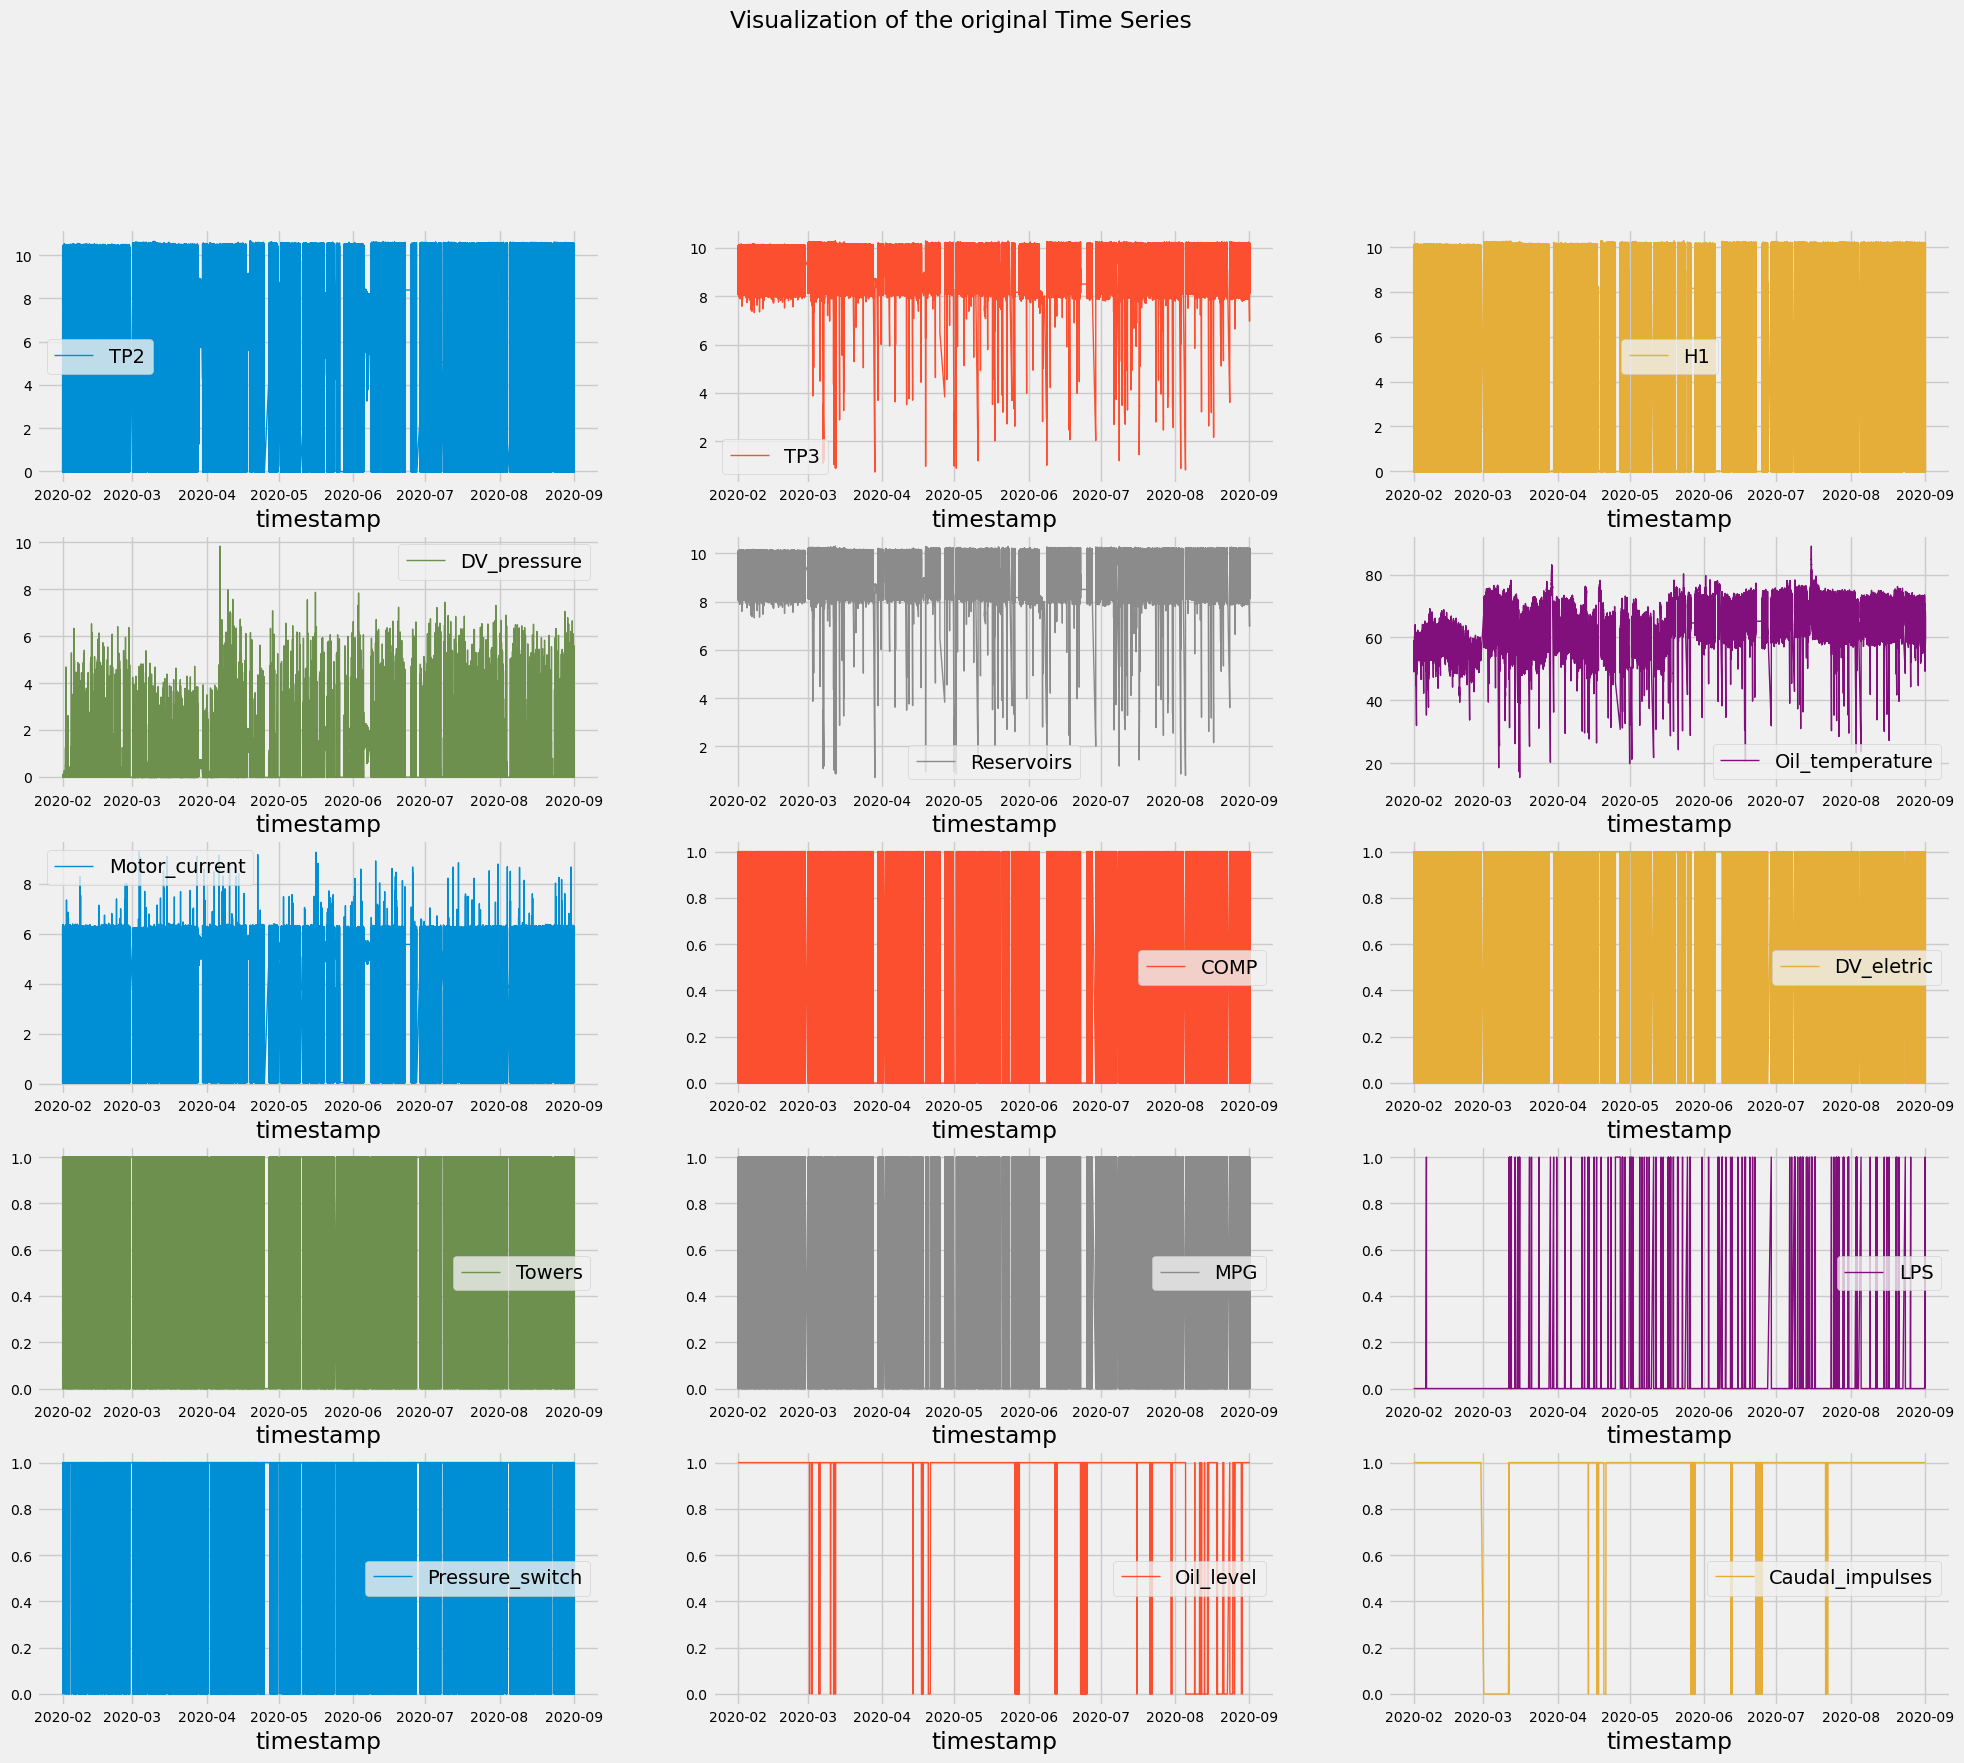

In [7]:
# Plot the time series
plt.style.use('fivethirtyeight')
df.plot(subplots=True,
        layout=(6, 3),
        figsize=(22,22),
        fontsize=10, 
        linewidth=1,
        sharex=False,
        title='Visualization of the original Time Series')
plt.show()

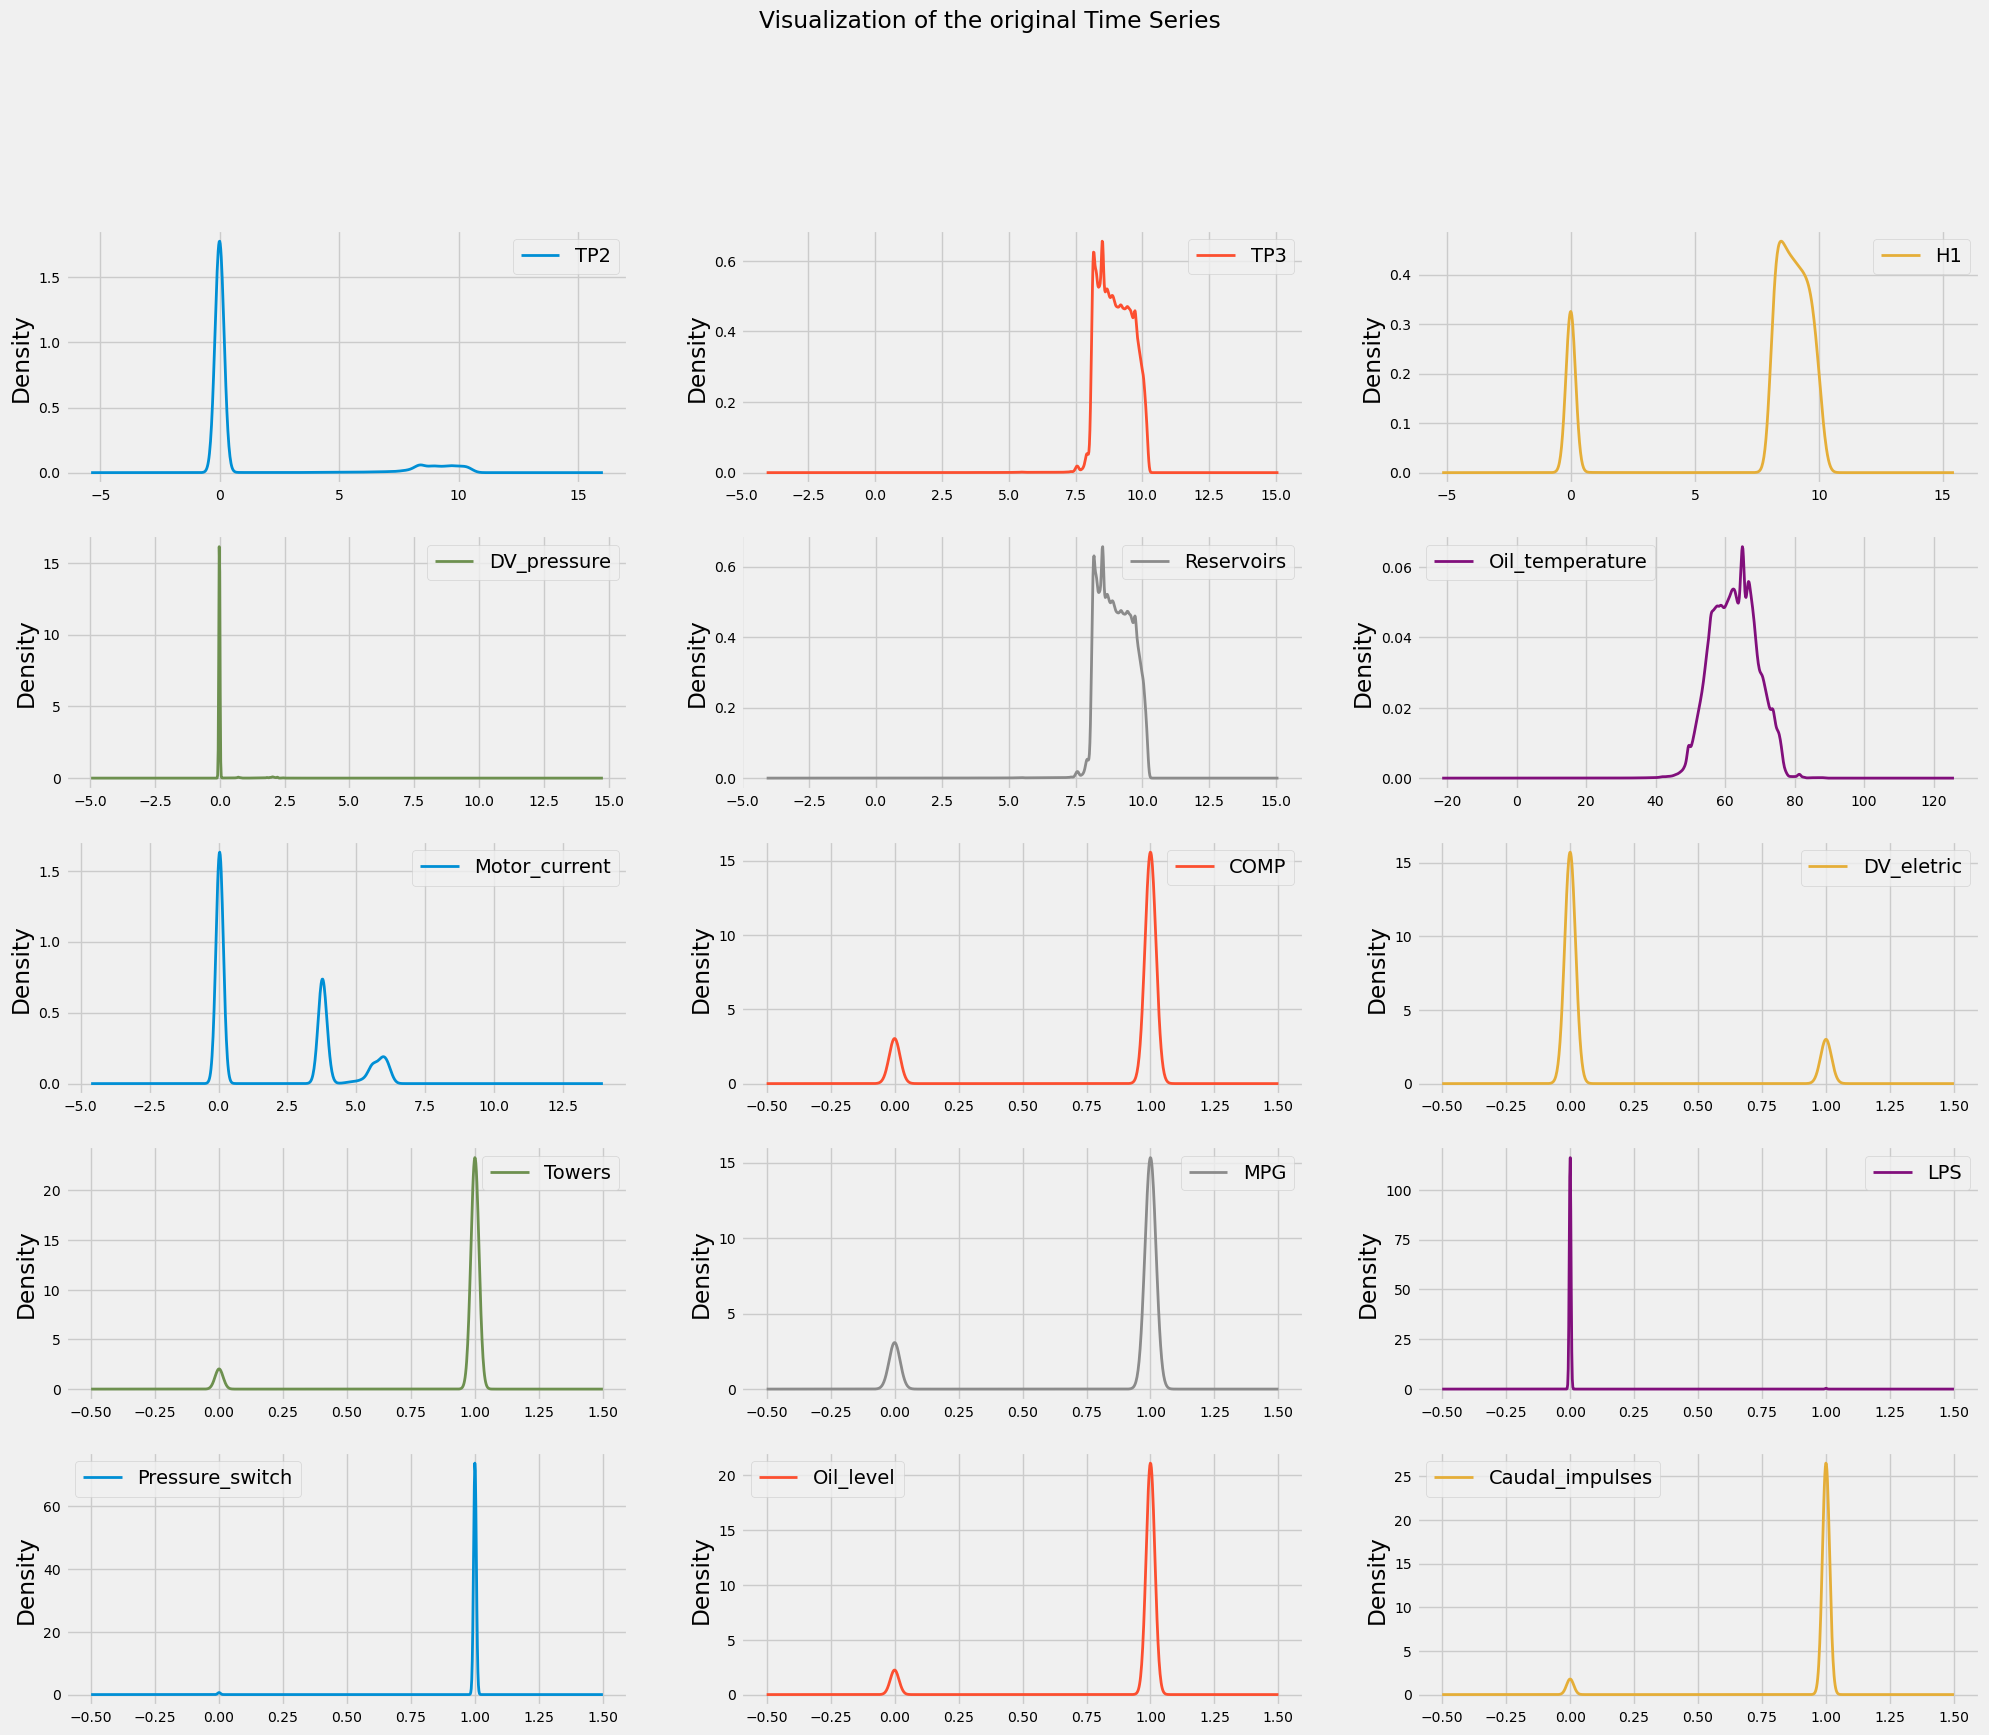

In [8]:
# Plot the time series
plt.style.use('fivethirtyeight')
df.plot(kind='kde',
        subplots=True,
        layout=(6, 3),
        figsize=(22,22),
        fontsize=10, 
        linewidth=2,
        sharex=False,
        title='Visualization of the original Time Series')
plt.show()


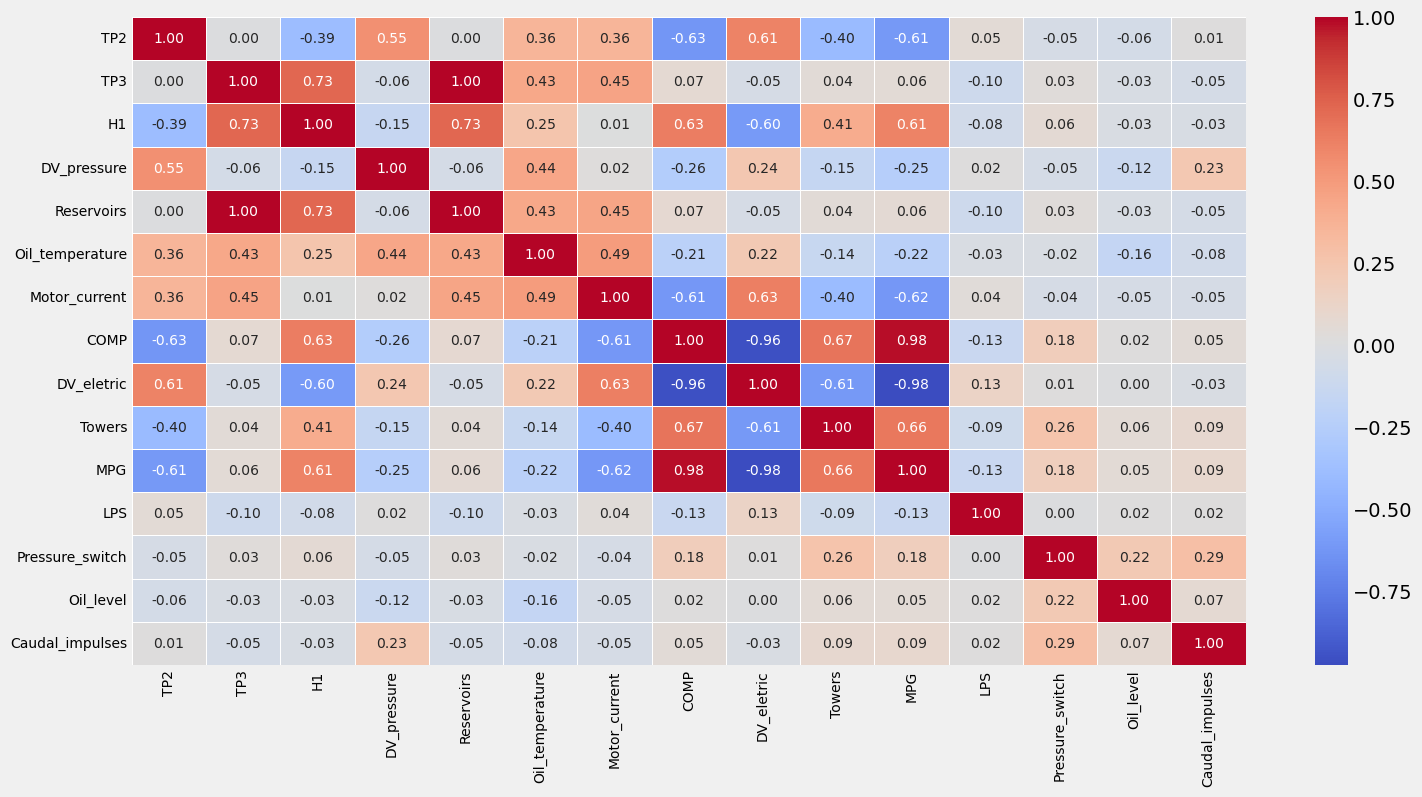

In [9]:
# Let's also draw a heatmap visualization of the correlation matrix
corr_matrix = df.corr(method='spearman')
f, ax = plt.subplots(figsize=(16,8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', linewidth=0.4,
            annot_kws={"size": 10}, cmap='coolwarm', ax=ax)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()


# Guys if you liked the sample notebook and downloaded this dataset, please consider upvoting the **Dataset** if you want. 
# This will really help me grow in field of datasets on kaggle and continue my contribution here. 😊